In [1]:
from util import preprocessing_simple_train

df = preprocessing_simple_train()

In [2]:
import numpy as np
month_to_day = [0,31,28,31,30,31,30,31,31,30,31,30,31]
for i in range(1,13):
    month_to_day[i] += month_to_day[i-1] 
tmp = df['rainfall_train.ef_month'].apply(lambda x: month_to_day[x])
df['daysin'] = np.sin(tmp)
df['daycos'] = np.cos(tmp)

In [3]:
import numpy as np 

clt_df = df[['rainfall_train.v01', 'rainfall_train.v02',
       'rainfall_train.v03', 'rainfall_train.v04', 'rainfall_train.v05',
       'rainfall_train.v06', 'rainfall_train.v07', 'rainfall_train.v08',
       'rainfall_train.v09']]
clt_df.columns =np.array(['V1','V2','V3','V4','V5','V6','V7','V8','V9'])

## 데이터 전처리


In [4]:
from sklearn.cluster import KMeans

num_cluster =4
kmeans = KMeans(n_clusters=num_cluster, max_iter=500, random_state=42)
labels = kmeans.fit_predict(clt_df)

In [5]:
clt_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
1,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
2,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
3,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
80,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1448757,0.02,0.05,0.00,0.02,0.00,0.0,0.0,0.0,0.0
1448758,0.04,0.04,0.02,0.02,0.01,0.0,0.0,0.0,0.0
1448759,0.04,0.04,0.02,0.02,0.01,0.0,0.0,0.0,0.0
1448760,0.02,0.02,0.02,0.00,0.02,0.0,0.0,0.0,0.0


KeyboardInterrupt: 

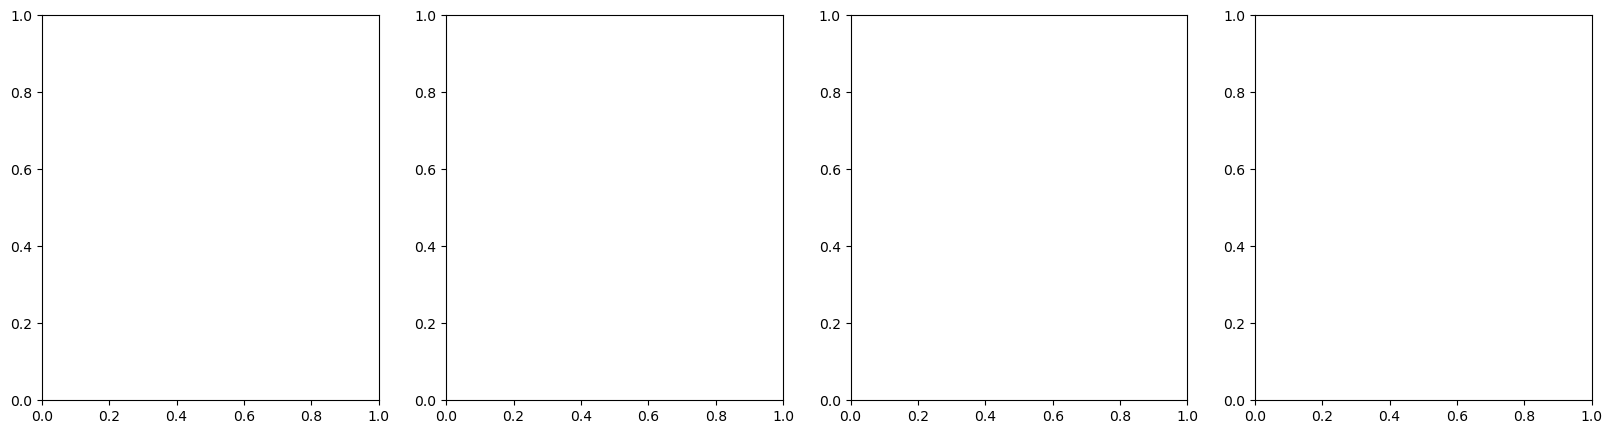

In [7]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

iter_num = [3,4,5,6]

fig, axes = plt.subplots(ncols=4, figsize=(20,5))
for idx ,num_cluster in enumerate(iter_num):
    kmeans = KMeans(n_clusters=num_cluster, max_iter=500, random_state=42)
    labels = kmeans.fit_predict(clt_df)
    score = silhouette_score(clt_df,labels)
    silhoutte_values = silhouette_samples(clt_df,labels)
    axes[idx].set_title(f"num_cluster: {num_cluster} silhoutte_score: {round(score,3)}")
    axes[idx].set_xlim([-0.1,1])
    axes[idx].set_ylim([0,len(clt_df) + (num_cluster+1) *10])
    axes[idx].set_yticks([])
    axes[idx].set_xticks([0.2,0.4,0.6,0.8,1])
    y_lower = 10
    for i in range(num_cluster):
        ith_values = silhoutte_values[labels == i]
        ith_values.sort()
        y_upper = y_lower + len(ith_values)
        color = cm.nipy_spectral(float(i)/num_cluster)
        axes[idx].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_values, facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper +10
    axes[idx].axvline(x=score,color='red',linestyle="--")

>클러스터 4로 잡고 진행



In [ ]:
clt_means = KMeans(n_clusters=4, random_state=42)

clt_means.fit(clt_df)

KMeans(n_clusters=4, random_state=42)

## 테스트 데이터 확인

In [8]:
from util import preprocessing_simple_test
import pandas as pd 

test_df = pd.read_csv('rainfall_test.csv')
test_df = test_df.drop(columns=['Unnamed: 0', 'rainfall_test.fc_year', 'rainfall_test.fc_month',
       'rainfall_test.fc_day', 'rainfall_test.fc_hour','rainfall_test.ef_year'])
tmp = test_df.groupby(by=['rainfall_test.stn4contest','rainfall_test.ef_month','rainfall_test.ef_day','rainfall_test.ef_hour'])['rainfall_test.dh'].min().reset_index()
tmp2 = pd.merge(test_df,tmp,on=['rainfall_test.stn4contest','rainfall_test.ef_month','rainfall_test.ef_day','rainfall_test.ef_hour'])
result = tmp2[tmp2['rainfall_test.dh_x']==tmp2['rainfall_test.dh_y']].drop(columns=['rainfall_test.dh_x','rainfall_test.dh_y'])
result.columns = np.array(['STN','M', 'D','H', 'V1', 'V2','V3', 'V4', 'V5','V6', 'V7', 'V8','V9', 'class_interval'])
for i in range(1,9):
    result[f"V{i}"] = result[f"V{i}"] -result[f"V{i+1}"]
for i in range(1,10):
    result[f"V{i}"] = result[f"V{i}"] / 100.0
result 

,STN,M,D,H,V1,V2,V3,V4,V5,V6,V7,V8,V9,class_interval
0,STN031,5,1,12,0.22,0.33,0.12,0.01,0.00,0.00,0.0,0.0,0.0,NaN
1,STN031,5,1,15,0.17,0.40,0.21,0.05,0.00,0.00,0.0,0.0,0.0,NaN
2,STN031,5,1,18,0.11,0.06,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN
3,STN031,5,1,21,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN
80,STN031,5,2,0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121995,STN035,10,10,9,0.00,0.00,0.02,0.00,0.02,0.00,0.0,0.0,0.0,NaN
121996,STN035,10,10,12,0.02,0.00,0.01,0.05,0.00,0.00,0.0,0.0,0.0,NaN
121997,STN035,10,10,15,0.02,0.00,0.01,0.05,0.00,0.00,0.0,0.0,0.0,NaN
121998,STN035,10,10,18,0.02,0.00,0.00,0.02,0.04,0.02,0.0,0.0,0.0,NaN


In [9]:
import numpy as np
month_to_day = [0,31,28,31,30,31,30,31,31,30,31,30,31]
for i in range(1,13):
    month_to_day[i] += month_to_day[i-1] 
tmp = result['M'].apply(lambda x: month_to_day[x])
result['daysin'] = np.sin(tmp)
result['daycos'] = np.cos(tmp)

In [10]:
result

,STN,M,D,H,V1,V2,V3,V4,V5,V6,V7,V8,V9,class_interval,daysin,daycos
0,STN031,5,1,12,0.22,0.33,0.12,0.01,0.00,0.00,0.0,0.0,0.0,NaN,0.202150,0.979355
1,STN031,5,1,15,0.17,0.40,0.21,0.05,0.00,0.00,0.0,0.0,0.0,NaN,0.202150,0.979355
2,STN031,5,1,18,0.11,0.06,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.202150,0.979355
3,STN031,5,1,21,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.202150,0.979355
80,STN031,5,2,0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.202150,0.979355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121995,STN035,10,10,9,0.00,0.00,0.02,0.00,0.02,0.00,0.0,0.0,0.0,NaN,0.670207,-0.742174
121996,STN035,10,10,12,0.02,0.00,0.01,0.05,0.00,0.00,0.0,0.0,0.0,NaN,0.670207,-0.742174
121997,STN035,10,10,15,0.02,0.00,0.01,0.05,0.00,0.00,0.0,0.0,0.0,NaN,0.670207,-0.742174
121998,STN035,10,10,18,0.02,0.00,0.00,0.02,0.04,0.02,0.0,0.0,0.0,NaN,0.670207,-0.742174


In [15]:
test_df = result.drop(columns=['STN','M','D','H','class_interval','daysin','daycos'])


In [16]:
test_label= clt_means.predict(test_df)

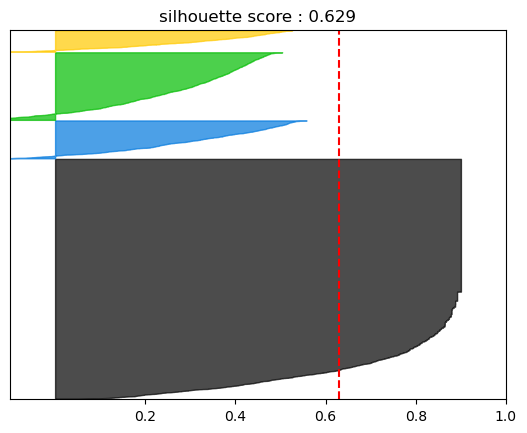

In [17]:

y_lower = 10
score = silhouette_score(test_df,test_label)
values = silhouette_samples(test_df,test_label)
plt.xlim([-0.1,1])
plt.ylim([0,len(values) + 5 *10])
plt.yticks([])
plt.xticks([0.2,0.4,0.6,0.8,1])
plt.title(f"silhouette score : {round(score,3)}")
for i in range(4):
    ith_value = values[test_label == i]
    ith_value.sort()
    y_upper = y_lower + len(ith_value)
    color = cm.nipy_spectral(float(i)/4)
    plt.fill_betweenx(np.arange(y_lower,y_upper), 0, ith_value, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper+10
plt.axvline(x=score,color='red',linestyle='--')
    

## 분류된 데이터 모델 검증

A년도 test, B,C 년도 train

In [18]:
test_df = df[df['rainfall_train.ef_year'] == 'A']
train_df = df[df['rainfall_train.ef_year'] != 'A']


In [25]:
train_df

,rainfall_train.stn4contest,rainfall_train.ef_year,rainfall_train.ef_month,rainfall_train.ef_day,rainfall_train.ef_hour,rainfall_train.v01,rainfall_train.v02,rainfall_train.v03,rainfall_train.v04,rainfall_train.v05,rainfall_train.v06,rainfall_train.v07,rainfall_train.v08,rainfall_train.v09,rainfall_train.vv,daysin,daycos
24476,STN001,B,5,1,12,0.05,0.28,0.46,0.17,0.02,0.0,0.0,0.0,0.0,0.6,0.202150,0.979355
24477,STN001,B,5,1,15,0.13,0.39,0.33,0.09,0.02,0.0,0.0,0.0,0.0,0.0,0.202150,0.979355
24478,STN001,B,5,1,18,0.04,0.22,0.28,0.29,0.16,0.0,0.0,0.0,0.0,0.5,0.202150,0.979355
24479,STN001,B,5,1,21,0.02,0.13,0.24,0.36,0.24,0.0,0.0,0.0,0.0,2.6,0.202150,0.979355
24556,STN001,B,5,2,0,0.00,0.03,0.43,0.53,0.01,0.0,0.0,0.0,0.0,0.6,0.202150,0.979355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457247,STN020,C,10,10,9,0.02,0.05,0.00,0.02,0.00,0.0,0.0,0.0,0.0,0.5,0.670207,-0.742174
1457248,STN020,C,10,10,12,0.04,0.04,0.02,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.670207,-0.742174
1457249,STN020,C,10,10,15,0.04,0.04,0.02,0.02,0.01,0.0,0.0,0.0,0.0,1.9,0.670207,-0.742174
1457250,STN020,C,10,10,18,0.02,0.02,0.02,0.00,0.02,0.0,0.0,0.0,0.0,1.9,0.670207,-0.742174


In [21]:
y = train_df.pop('rainfall_train.class_interval')
x = train_df.drop(columns=['rainfall_train.stn4contest','rainfall_train.ef_year','rainfall_train.ef_month','rainfall_train.ef_day','rainfall_train.ef_hour','rainfall_train.vv','daysin','daycos'])
y_v = test_df.pop('rainfall_train.class_interval')
x_v = test_df.drop(columns=['rainfall_train.stn4contest','rainfall_train.ef_year','rainfall_train.ef_month','rainfall_train.ef_day','rainfall_train.ef_hour','rainfall_train.vv','daysin','daycos'])


In [22]:
import numpy as np 
x.columns= np.array(['V1','V2','V3','V4','V5','V6','V7','V8','V9'])
x_v.columns= np.array(['V1','V2','V3','V4','V5','V6','V7','V8','V9'])


In [23]:
clt_labels = clt_means.predict(x)
clt_labels_v = clt_means.predict(x_v)

In [26]:
x['daysin'] = train_df['daysin']
x['hour'] = train_df['rainfall_train.ef_hour'] /24
x['daycos'] = train_df['daycos']

x_v['daysin'] = test_df['daysin']
x_v['hour'] = test_df['rainfall_train.ef_hour'] /24
x_v['daycos'] = test_df['daycos']

In [30]:
from sklearn.ensemble import RandomForestClassifier
from util import compute_csi
csi_data = []

for num_esti in range(5,101,3):
    start_data = 0
    model_list = []
    for i in range(4):
        model = RandomForestClassifier(n_estimators=num_esti)
        num_data = len(x[clt_labels == i])
        model.fit(x[clt_labels == i],y[start_data:start_data+num_data])
        model_list.append(model)
        start_data += num_data

    y_pred_v= []
    for i in range(4):
        tmp_y = model_list[i].predict(x_v[clt_labels_v==i])
        y_pred_v.extend(tmp_y)
    y_pred_v = np.array(y_pred_v)
    csi_data.append(compute_csi(y_v,y_pred_v))

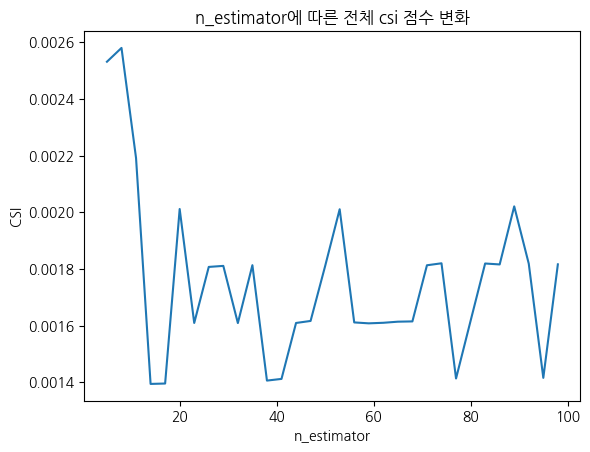

In [31]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "NanumGothic"
plt.title("n_estimator에 따른 전체 csi 점수 변화")
plt.ylabel("CSI")
plt.xlabel("n_estimator")
plt.plot(np.array(range(5,101,3)), csi_data)

n_estimator: 5

각 클러스터별 점수


In [47]:
tmp_model_list = []
start_data = 0
for i in range(4):
    tmp_model = RandomForestClassifier(n_estimators=3)
    num_data=len(x[clt_labels == i])
    tmp_model.fit(x[clt_labels==i],y[start_data:start_data+num_data])
    start_data += num_data
    tmp_model_list.append(tmp_model)

In [33]:
from sklearn.linear_model import LogisticRegression
r_model_list = []
start_data = 0
for i in range(4):
    tmp_model = LogisticRegression(max_iter=1000, random_state=42)
    num_data=len(x[clt_labels == i])
    tmp_model.fit(x[clt_labels==i],y[start_data:start_data+num_data])
    start_data += num_data
    r_model_list.append(tmp_model)

In [48]:
# train data
start_data = 0
for i in range(4):
    num_data = len(x[clt_labels==i])
    y_pred = tmp_model_list[i].predict(x[clt_labels==i])
    print(f"{i}th cluster csi score : {compute_csi(y[start_data:start_data+num_data],y_pred)}")
    start_data += num_data

0th cluster csi score : 0.2153151588817503
1th cluster csi score : 0.6916524701873935
2th cluster csi score : 0.6903225806451613
3th cluster csi score : 0.6533333333333333


In [49]:
start_data = 0
for i in range(4):
    num_data = len(x_v[clt_labels_v==i])
    y_pred = tmp_model_list[i].predict(x_v[clt_labels_v==i])
    print(f"{i}th cluster csi score : {compute_csi(y_v[start_data:start_data+num_data],y_pred)}")
    start_data += num_data

0th cluster csi score : 0.004420866489832007
1th cluster csi score : 0.0017482517482517483
2th cluster csi score : 0.0036199095022624436
3th cluster csi score : 0.0


In [111]:
pd.Series(clt_labels).value_counts()

0    35236
2    10488
1     4444
3     1832
Name: count, dtype: int64

In [94]:
train_df[clt_labels==0]

,rainfall_train.stn4contest,rainfall_train.ef_year,rainfall_train.ef_month,rainfall_train.ef_day,rainfall_train.ef_hour,rainfall_train.v01,rainfall_train.v02,rainfall_train.v03,rainfall_train.v04,rainfall_train.v05,rainfall_train.v06,rainfall_train.v07,rainfall_train.v08,rainfall_train.v09,rainfall_train.vv
24558,STN001,B,5,2,6,0.05,0.04,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
24559,STN001,B,5,2,9,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,-999.0
24636,STN001,B,5,2,12,0.11,0.01,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
24637,STN001,B,5,2,15,0.18,0.04,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
24638,STN001,B,5,2,18,0.07,0.03,0.03,0.01,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457247,STN020,C,10,10,9,0.02,0.05,0.00,0.02,0.00,0.0,0.0,0.0,0.0,0.5
1457248,STN020,C,10,10,12,0.04,0.04,0.02,0.02,0.01,0.0,0.0,0.0,0.0,0.0
1457249,STN020,C,10,10,15,0.04,0.04,0.02,0.02,0.01,0.0,0.0,0.0,0.0,1.9
1457250,STN020,C,10,10,18,0.02,0.02,0.02,0.00,0.02,0.0,0.0,0.0,0.0,1.9


In [67]:
from sklearn.metrics import accuracy_score
from util import compute_csi

compute_csi(y_v,y_pred_v)

0.0007947546195112259

In [22]:
result.describe()

,rainfall_train.ef_month,rainfall_train.ef_day,rainfall_train.ef_hour,rainfall_train.v01,rainfall_train.v02,rainfall_train.v03,rainfall_train.v04,rainfall_train.v05,rainfall_train.v06,rainfall_train.v07,rainfall_train.v08,rainfall_train.v09,rainfall_train.vv,rainfall_train.class_interval
count,78000.000000,78000.000000,78000.000000,78000.000000,78000.000000,78000.000000,78000.000000,78000.000000,78000.000000,78000.000000,78000.000000,78000.000000,78000.000000,78000.000000
mean,7.184615,15.215385,10.518462,0.050427,0.072411,0.051747,0.045901,0.052128,0.028443,0.014154,0.002934,0.001169,-5.286060,-5.454487
std,1.544153,8.917615,6.873883,0.076210,0.113808,0.090834,0.091465,0.124256,0.094614,0.070269,0.025763,0.018569,78.068195,77.954750
min,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000
25%,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,15.000000,12.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,23.000000,18.000000,0.080000,0.110000,0.070000,0.040000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,31.000000,21.000000,0.790000,0.960000,0.980000,0.750000,0.970000,0.970000,0.900000,0.690000,0.990000,203.200000,9.000000


In [3]:
train_df.columns

Index(['Unnamed: 0', 'rainfall_train.fc_year', 'rainfall_train.fc_month',
       'rainfall_train.fc_day', 'rainfall_train.fc_hour',
       'rainfall_train.stn4contest', 'rainfall_train.dh',
       'rainfall_train.ef_year', 'rainfall_train.ef_month',
       'rainfall_train.ef_day', 'rainfall_train.ef_hour', 'rainfall_train.v01',
       'rainfall_train.v02', 'rainfall_train.v03', 'rainfall_train.v04',
       'rainfall_train.v05', 'rainfall_train.v06', 'rainfall_train.v07',
       'rainfall_train.v08', 'rainfall_train.v09', 'rainfall_train.vv',
       'rainfall_train.class_interval'],
      dtype='object')

,rainfall_train.stn4contest,rainfall_train.ef_year,rainfall_train.ef_month,rainfall_train.ef_day,rainfall_train.ef_hour,rainfall_train.v01,rainfall_train.v02,rainfall_train.v03,rainfall_train.v04,rainfall_train.v05,rainfall_train.v06,rainfall_train.v07,rainfall_train.v08,rainfall_train.v09,rainfall_train.vv,rainfall_train.class_interval
0,STN001,A,5,1,12,0,0,0,0,0,0,0,0,0,0.0,0
1,STN001,A,5,1,15,0,0,0,0,0,0,0,0,0,0.0,0
2,STN001,A,5,1,18,0,0,0,0,0,0,0,0,0,0.0,0
3,STN001,A,5,1,21,0,0,0,0,0,0,0,0,0,0.0,0
80,STN001,A,5,2,0,0,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457247,STN020,C,10,10,9,9,7,2,2,0,0,0,0,0,0.5,3
1457248,STN020,C,10,10,12,13,9,5,3,1,0,0,0,0,0.0,0
1457249,STN020,C,10,10,15,13,9,5,3,1,0,0,0,0,1.9,4
1457250,STN020,C,10,10,18,8,6,4,2,2,0,0,0,0,1.9,4
